In [1]:
#explore the relationship between model complexity and generalization performance
#by varying the degree of the polynomial regression model
#(by adding powers of a feature as new features) as part of engineering the features of the data

In [58]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


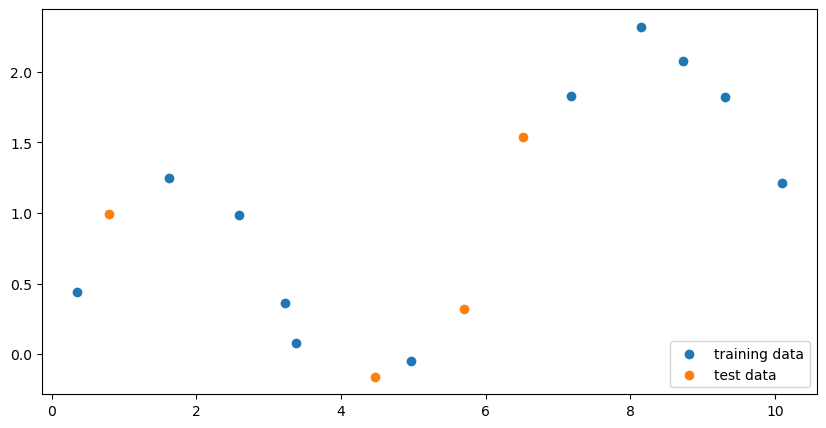

In [49]:
def generateData(n=15):
    np.random.seed(0)
    #generate random data points from 0 to 10 with 15 evenly spaced points with some noise
    x = np.linspace(0, 10, n) + np.random.randn(n)/5
    y = np.sin(x)+x/6 + np.random.randn(n)/10
    return x, y

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(*generateData(), random_state=0)

#plot the data
def plotData():
    plt.figure(figsize=(10,5))
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4)
    plt.show()    

plotData()

In [50]:
#Feature engineer the generated data X by adding polynomial features of degree N
#initialise a list of degrees 
list_deg = [1, 3, 6, 9]
#initial number of predicted values
num_points = 100
#initialise the 2dim array to store the predicted values
degree_predictions = np.zeros((len(list_deg), num_points))
X_test2 = np.linspace(0,10,100).reshape(-1,1)
for i, N in enumerate(list_deg):
        #initialise the polynomialfeature transformer 
        poly = PolynomialFeatures(degree=N)
        #fits and transforms the input train data and create new features of degree N
        X_train_ = poly.fit_transform(X_train.reshape(-1,1))
        #instantiate a linear regressor
        linreg = LinearRegression()
        #train the linear regressor with X_train data with polynomial features added of degree N
        linreg.fit(X_train_, y_train)
        #fits and transforms the input test data and create new features of degree N
        X_test_ = poly.fit_transform(X_test2.reshape(-1,1))
        #store on ith row for the predicted values
        degree_predictions[i,:] = linreg.predict(X_test_)

degree_predictions

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

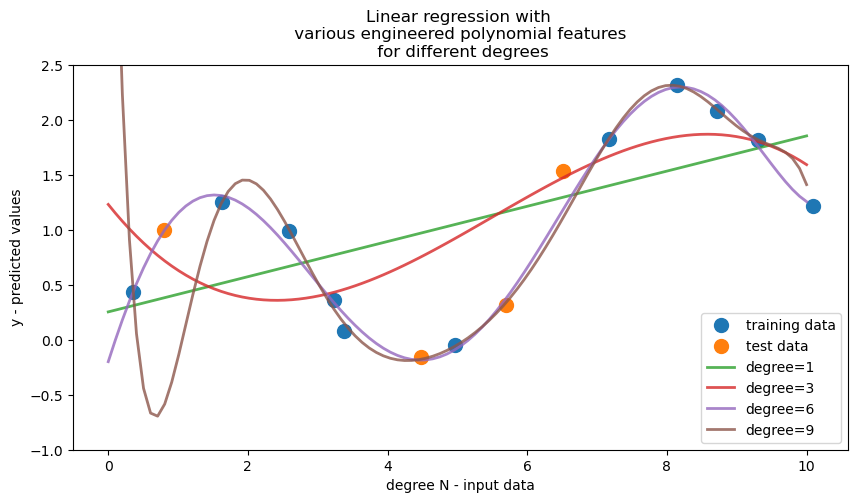

In [57]:
#plot the predicted values
def plotPredictions():
    plt.figure(figsize=(10,5))
    #plot the training data
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    #plot the test data
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    #plot the predicted values , plt.plot(x,y) where x is the input and y is the y_pred for degree N
    for i, N in enumerate(list_deg):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(N))
    #plot legend at location 4
    plt.legend(loc=4)
    #display and limit y values between -1 and 2.5
    plt.ylim(-1,2.5)
    #display the title
    plt.title('Linear regression with \n various engineered polynomial features \n for different degrees')
    plt.xlabel('degree N - input data')
    plt.ylabel('y - predicted values')
    plt.show()
plotPredictions()

In [61]:
#To investigate which degree of polynomial regression model fits the data best
#by investigating the R2 score on the train data and test data
#R2 score is the coefficient of determination

#initialise the 2dim array to store the R2 scores
r2_train = np.array([])
r2_test = np.array([])

#initialise a list of degrees from 0 to 9
list_deg = list(range(10))

for i, N in enumerate(list_deg):
    #initialise the polynomialfeature transformer of degree N
    poly = PolynomialFeatures(degree=N)
    #fits and transforms the input train data and create new features of degree N
    X_train_ = poly.fit_transform(X_train.reshape(-1,1))
    #instantiate a linear regressor
    linreg = LinearRegression()
    #train the linear regressor with X_train data with polynomial features added of degree N
    linreg.fit(X_train_, y_train)
    #fits and transforms the input test data and create new features of degree N
    X_test_ = poly.fit_transform(X_test.reshape(-1,1))
    #store on ith row for the predicted values
    #degree_predictions[i,:] = linreg.predict(X_test_)
    #calculate the R2 score on the train data
    r2_train = np.append(r2_train, linreg.score(X_train_, y_train))
    #calculate the R2 score on the test data
    r2_test = np.append(r2_test, linreg.score(X_test_, y_test))

print(r2_train)
print(r2_test)

[0.         0.42924578 0.4510998  0.58719954 0.91941945 0.97578641
 0.99018233 0.99352509 0.99637545 0.99803706]
[-0.47808642 -0.45237104 -0.06856984  0.00533105  0.73004943  0.87708301
  0.9214094   0.92021504  0.63247936 -0.64525583]


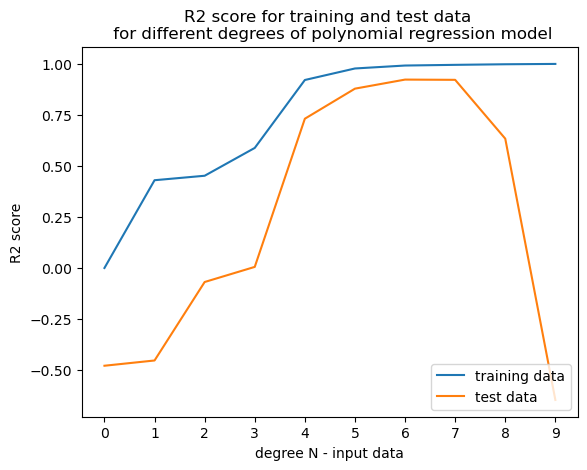

overfitting at degree 9
well generalised at degree 6
underfitting at degree 0


In [86]:
#based on the R2 scores, determine the degree of polynomial regression model that fits the data best
#what degree level corresponds to a model that is underfitting?
#what degree level corresponds to a model that is overfitting?

#plot the R2 scores
plt.figure()    
plt.plot(list_deg, r2_train, label='training data')
plt.plot(list_deg, r2_test, label='test data')
plt.legend(loc=4)
plt.xticks(list_deg)
plt.xlabel('degree N - input data')
plt.ylabel('R2 score')
plt.title('R2 score for training and test data \n for different degrees of polynomial regression model')
plt.show()

r2_gap = np.subtract(r2_train, r2_test)
#overfitting: widest gap between the R2 scores is at degree 
overfitting = np.argmax(r2_gap)
print("overfitting at degree {}".format(overfitting))
#well generalised: narrowest gap between the R2 scores is at degree
well_generalised = np.argmin(r2_gap)
print("well generalised at degree {}".format(well_generalised))
#underfitting: lowest R2 score on the test data is at degree
#threshold for underfitting at lower bound of up to degree 5
print("underfitting at degree {}".format(np.argmin(r2_test[:5])))